In [1]:
#import libraries

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [13]:
#load dataset

dataset = pd.read_csv('musteriler.csv')
dataset.head(10)

,musteriID,Cins,Yash,Maas,Statusu
0,15624510,Kishi,19,19000,0
1,15810944,Kishi,35,20000,0
2,15668575,Qadin,26,43000,0
3,15603246,Qadin,27,57000,0
4,15804002,Kishi,19,76000,0
5,15728773,Kishi,27,58000,0
6,15598044,Qadin,27,84000,0
7,15694829,Qadin,32,150000,1
8,15600575,Kishi,25,33000,0
9,15727311,Qadin,35,65000,0


In [4]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,[4]].values

In [6]:
#split test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p = 2)
classifier.fit(X_train, y_train)

C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [14]:
#accuracy evaluation
from sklearn import metrics
print('Train set accuracy ', metrics.accuracy_score(y_train, classifier.predict(X_train)))
print('Test set accuracy ', metrics.accuracy_score(y_test, y_pred))
      

Train set accuracy  0.8766666666666667
Test set accuracy  0.83


In [18]:
#other k values

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustMatrx = []

for i in range(1, Ks):
    classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\Users\NicatZeynalov\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passe

array([0.83, 0.77, 0.78, 0.81, 0.83, 0.84, 0.81, 0.84, 0.84])

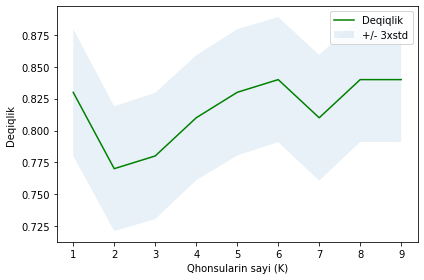

In [20]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Deqiqlik ', '+/- 3xstd'))
plt.ylabel('Deqiqlik ')
plt.xlabel('Qhonsularin sayi (K)')
plt.tight_layout()
plt.show()